<a href="https://colab.research.google.com/github/greensky0107/first_repository/blob/master/Day39_TimeSeries_Data_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5  미니 프로젝트: 시계열 분류

#5-1 비정상 데이터를 정상으로 만들기

In [247]:
# 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [248]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
ap = pd.read_csv(url)
print(ap.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


In [249]:
# 'Month' column을 삭제합니다.
ap = ap.drop('Month', axis=1)
ap

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


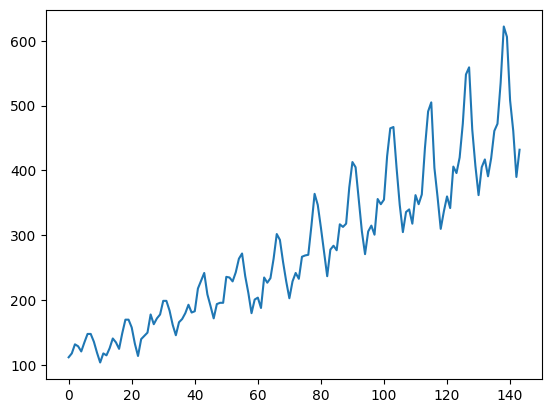

In [250]:
plt.figure()
plt.plot(ap)
plt.show()

In [255]:
# 데이터 확인
adfuller(ap)

# p-value print
print(adfuller(ap)[1])

# P-value가 유의수준 0.05보다 크므로, 귀무가설 (단위근이 존재하는 경우, 그 시계열은 비정상 시계열이다)을 채택.
# airpassenger dataset은 비정상 데이터

0.991880243437641


In [256]:
# np.log를 통해서 log transformation  분산을 일정하게
log_transformed = np.log(ap)
log_transformed

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


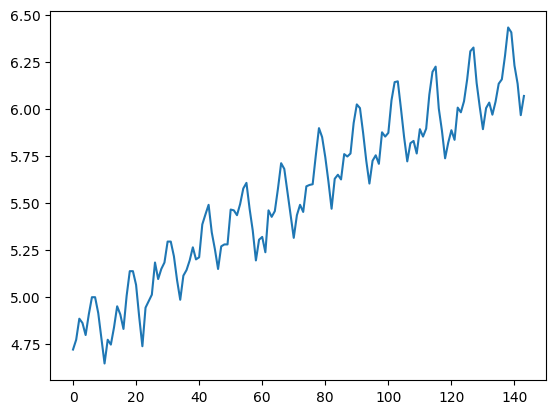

In [257]:
# 분산이 일정해짐.
plt.figure()
plt.plot(log_transformed)
plt.show()

In [216]:
# diff() 함수를 통해 차분(differencing)을 추가 시행해서 추세(trend)를 제거
diffed = log_transformed.diff()
diffed

,Passengers
0,NaN
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


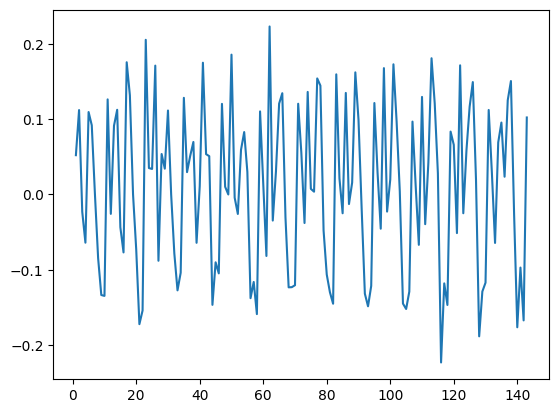

In [258]:
# 커지는 분산과 증가하는 추세를 제거한 정상성을 확보한  air passengers dats
plt.figure()
plt.plot(diffed)
plt.show()

In [259]:
# diff에 12라는 값을 넣어주면 주기를 12로 하는 계절 차분을 수행할 수 있습니다.
seasonally_diffed = diffed.diff(12)
# 차분을 하면 데이터가 짧아지기 때문에 빈칸을 제거해야 합니다.
seasonally_diffed.dropna(inplace = True)
seasonally_diffed

,Passengers
13,0.039164
14,0.000361
15,-0.020496
16,-0.012939
17,0.066148
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


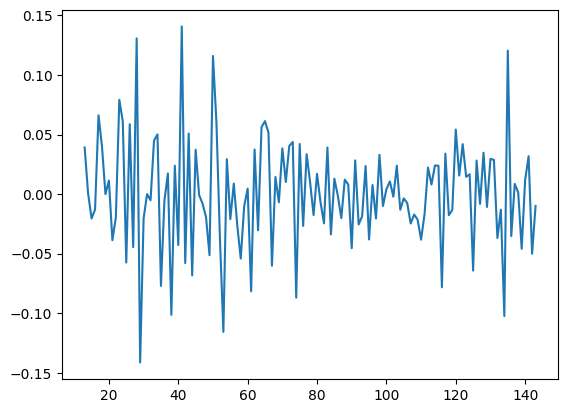

In [260]:
# 아래와 같은 데이터를 얻을 수 있습니다.
plt.figure()
plt.plot(seasonally_diffed)
plt.show()

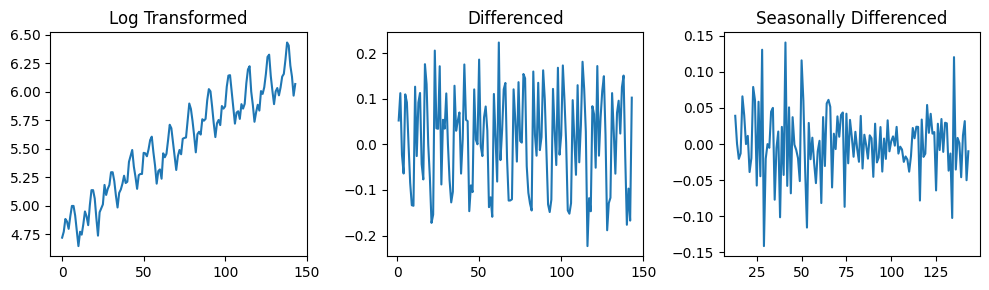

In [261]:
# 로그변환, 차분(1차), 계절차분의 그래프를 비교해보면, 계절차분을 진행했을 때 정상성이 더 획득된 것 확인 가능.

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

axes[0].plot(log_transformed)
axes[0].set_title('Log Transformed')

axes[1].plot(diffed)
axes[1].set_title('Differenced')

axes[2].plot(seasonally_diffed)
axes[2].set_title('Seasonally Differenced')

plt.tight_layout()
plt.show()

In [262]:
# transform된 dataset의 정상성 검증
# adfuller : Python에서 statsmodels을 통해 ADF(Augmented Dickey-Fuller) test
# 결과값으로 stat, p-value(유의 검정), usedlag(사용된 시차의 수), nobs (ADF 회귀 및 임계값 계산에 사용된 관측치의 수), crit, icb가 나옴.

from statsmodels.tsa.stattools import adfuller

def adf_test(x): # adf검정을 위한 함수 정의
    stat, p_value, lags, nobs, crit, icb = adfuller(x) # adfuller 함수를 이용하면 6가지 output이 나옵니다.
    print('ADF statistics')
    print(stat) # ADF 검정 통계량입니다.
    print('P-value')
    print(p_value) # P-value입니다.
    print('lags')
    print(lags) # ADF 검정 통계량입니다.
    print('nobs')
    print(nobs) # P-value입니다.
    print('crit')
    print(crit) # ADF 검정 통계량입니다.
    print('icb')
    print(icb) # P-value입니다.

In [263]:
# 계절차분까지 수행한 데이터로 adf 테스트를 수행합니다.
adf_test(seasonally_diffed)

# P-value가 유의수준 0.05보다 작으므로, 귀무가설 (단위근이 존재하는 경우, 그 시계열은 비정상 시계열이다)을 기각.
# 대립가설 (정상 시계열이다)를 채택

ADF statistics
-4.4433249418311425
P-value
0.00024859123113838495
lags
12
nobs
118
crit
{'1%': np.float64(-3.4870216863700767), '5%': np.float64(-2.8863625166643136), '10%': np.float64(-2.580009026141913)}
icb
-415.5597525461335


In [264]:
# 로그변환과 차분만 수행한 데이터로 adf 테스트를 수행해보니, 비정상으로 확인됨.
# diffed 데이터의 첫 번째 행은 NaN이므로 제거..
diffed_cleaned = diffed.dropna()
adf_test(diffed_cleaned)

# P-value가 유의수준 0.05보다 크므로, 귀무가설 (단위근이 존재하는 경우, 그 시계열은 비정상 시계열이다)을 채택.

ADF statistics
-2.717130598388114
P-value
0.07112054815086184
lags
14
nobs
128
crit
{'1%': np.float64(-3.4825006939887997), '5%': np.float64(-2.884397984161377), '10%': np.float64(-2.578960197753906)}
icb
-440.35846985568105


In [265]:
# 로그변환만 수행한 데이터로 adf 테스트를 수행해봄. 비정상 데이터로 확인됨.
adf_test(log_transformed)

# P-value가 유의수준 0.05보다 크므로, 귀무가설 (단위근이 존재하는 경우, 그 시계열은 비정상 시계열이다)을 채택.

ADF statistics
-1.7170170891069683
P-value
0.4223667747703874
lags
13
nobs
130
crit
{'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
icb
-445.3990312497209


#5-2 시계열 데이터 분류

In [266]:
# ⑥-1 : 데이터 다운로드 및 불러오기
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

# robot exection failures 데이터를 불러옵니다.
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [267]:
# ⑥-2 : 데이터셋 확인(timeseries와 y 확인)
timeseries # id, time을 제외하고 6개 column의 X변수가 나타납니다.

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [268]:
y # true/false가 제시되어 있습니다.

,0
1,True
2,True
3,True
4,True
5,True
...,...
84,False
85,False
86,False
87,False


In [269]:
# ⑥-3 : 데이터셋 가공
def custom_classification_split(x,y,test_size=0.3): # 수업 때 보았던 custom split 함수

    num_true = int(y.sum()*test_size)
    num_false = int((len(y)-y.sum())*test_size)

    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()

    y_train = y.drop(id_list)                            # y에서 id_list를 drop합니다.
    y_test = y.iloc[id_list].sort_index()                # 19~38, 1~6이 합쳐진 리스트를 정렬합니다.
    X_train = x[~x['id'].isin(id_list)] # 대괄호 안에 있는 timeseries의 id와 id_list가 일치하는 것만 사용하고 물결표시는 안에 조건이 포함되어 있지 않는것만 사용하는 것입니다.
    X_test = x[x['id'].isin(id_list)]   # timeseries의 id와 id_list가 일치하는 것만 사용해서 timeseries에 적용

    return X_train, y_train, X_test, y_test

In [270]:
# ⑥-4 : 데이터셋 나누기
# test set의 비율을 0.25로 지정해주세요.
X_train, y_train, X_test, y_test = custom_classification_split(timeseries, y, test_size=0.25)

In [271]:
# feature extraction parameter setting을 EfficientFCparameters 로 적용
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import select_features

settings = EfficientFCParameters()

In [272]:
# ⑥-5 : Feature extraction
efficient_features_train = extract_features(
                                    X_train,
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )
# train으로 분류된 67개 robot의 6개 time column = 67*6=402개에 대해 feature extract

Feature Extraction: 100%|██████████| 402/402 [00:39<00:00, 10.07it/s]


In [273]:
efficient_features_test = extract_features(
                                    X_test,
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )
# test로 분류된 21개  robot의 6개 time columns = 21*6=126개에 대해 feature extract

Feature Extraction: 100%|██████████| 126/126 [00:13<00:00,  9.63it/s]


In [274]:
# ⑥-6 : impute  train에 있는 null fill in
impute(efficient_features_train)

# 6개 time columns에 777개 각각 추가 = 6*777=4,662 개 feature로 증가
# 정수로 정의되지 않는 값은 0(zero)로 fill-in

/usr/local/lib/python3.11/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,0.0,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,0.0,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.022809,2.397895,2.302585,2.197225,0.0,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,0.937285,1.213008,1.906155,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,1.907284,2.098274,2.302585,2.197225,0.0,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.308605,1.893788,2.163956,2.197225,0.0,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,0.0,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,0.0,40.285714


In [275]:
# target(y_train)과 밀접한 feature만 고르면 610개로 줄어듬.

features_filtered_train = select_features(efficient_features_train, y_train)
features_filtered_train

# test에서는 target(y_test) 값이 없으므로,  select feature 적용이 안됨.  따라서 쓰지 않음.

,F_x__value_count__value_-1,F_x__range_count__max_1__min_-1,T_y__absolute_maximum,F_x__root_mean_square,F_x__abs_energy,F_z__variance,F_z__standard_deviation,F_x__mean_n_absolute_max__number_of_maxima_7,F_y__root_mean_square,"F_z__fft_coefficient__attr_""abs""__coeff_1",...,"T_y__augmented_dickey_fuller__attr_""teststat""__autolag_""AIC""",T_z__energy_ratio_by_chunks__num_segments_10__segment_focus_8,T_z__fourier_entropy__bins_5,"T_z__agg_autocorrelation__f_agg_""median""__maxlag_40","F_y__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4","F_z__fft_coefficient__attr_""imag""__coeff_5",T_y__autocorrelation__lag_2,"F_z__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""var""","T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","F_z__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4"
6,6.0,7.0,6.0,1.612452,39.0,9.288889,3.047768,2.000000,2.422120,5.872672,...,-5.098355,0.000000,0.974315,-0.053759,0.666667,6.928203,-0.057021,6.026667,0.000000,0.000000
7,8.0,13.0,7.0,1.183216,21.0,27.493333,5.243409,1.428571,1.341641,8.484127,...,-3.316022,0.000000,1.255482,-0.015625,0.000000,-9.526279,0.501718,7.946667,0.000000,5.687500
8,8.0,9.0,6.0,1.316561,26.0,19.048889,4.364503,1.571429,1.264911,8.823851,...,-4.738139,0.000000,1.494175,-0.082933,0.000000,-9.526279,-0.067322,24.586667,0.000000,0.000000
9,7.0,12.0,7.0,1.264911,24.0,16.222222,4.027682,1.571429,2.000000,10.111316,...,-2.500725,0.000000,1.255482,-0.115854,0.250000,-2.598076,-0.142012,22.986667,0.428571,5.200000
10,14.0,15.0,2.0,0.966092,14.0,0.462222,0.679869,1.000000,0.966092,1.014358,...,-4.949747,0.037114,0.937285,0.000000,0.000000,1.732051,0.024038,0.760000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,0.0,167.0,80.346334,96833.0,85257.040000,291.988082,105.285714,53.404120,2783.365175,...,-3.351622,0.106055,0.735622,-0.509609,1.000000,-212.176224,0.328074,15118.840000,2.500000,4025.187500
85,0.0,0.0,14.0,10.592450,1683.0,210.293333,14.501494,13.714286,10.076375,111.174346,...,-1.465265,0.196000,0.735622,-0.601287,0.000000,-29.444864,0.301205,7.306667,0.000000,21.687500
86,0.0,0.0,191.0,74.608757,83497.0,14742.862222,121.420189,98.142857,37.473546,999.770156,...,2.073587,0.018079,0.735622,-0.501329,2.000000,-126.439709,0.628661,-367.920000,2.000000,37.440000
87,0.0,0.0,471.0,306.097697,1405437.0,42011.315556,204.966621,340.000000,143.447551,1722.716668,...,-3.334106,0.117241,0.735622,-0.508700,0.000000,-209.578148,0.657270,20736.280000,2.000000,4317.187500


In [276]:
impute(efficient_features_test)

# 6개 time columns에 777개 각각 추가 = 6*777=4,662 개 feature로 증가
# 정수로 정의되지 않는 값은 0(zero)로 fill-in

/usr/local/lib/python3.11/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,1.073543,1.440235,2.079442,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020,0.0,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225,0.0,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225,0.0,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225,0.0,0.857143
19,1.0,0.0,0.0,1.0,99.0,6109.0,13.928571,-1.928571,-1.730769,1.0,...,0.974315,1.494175,1.906155,1.230932,1.704551,2.019815,2.163956,2.197225,0.0,1.428571
20,1.0,0.0,1.0,1.0,155.0,34455.0,16.714286,-13.142857,7.576923,-1.0,...,1.386294,1.667462,2.079442,1.564957,2.022809,2.271869,2.302585,2.197225,0.0,2.571429
21,1.0,0.0,0.0,1.0,-171.0,16495.0,20.928571,1.785714,3.961538,-1.0,...,0.735622,0.735622,0.735622,1.303876,1.791759,2.271869,2.302585,2.197225,0.0,17.285714
22,1.0,0.0,0.0,1.0,102.0,12700.0,10.785714,-8.071429,4.500000,-1.0,...,0.562335,0.735622,1.732868,1.524707,2.138333,2.397895,2.302585,2.197225,0.0,5.428571
23,1.0,0.0,0.0,1.0,67.0,10593.0,15.142857,-7.000000,3.000000,-3.0,...,0.974315,1.255482,2.079442,1.519383,2.369382,2.397895,2.302585,2.197225,0.0,3.714286


In [277]:
# Impute
impute(efficient_features_test)

efficient_features_test

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,1.073543,1.440235,2.079442,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020,0.0,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225,0.0,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225,0.0,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225,0.0,0.857143
19,1.0,0.0,0.0,1.0,99.0,6109.0,13.928571,-1.928571,-1.730769,1.0,...,0.974315,1.494175,1.906155,1.230932,1.704551,2.019815,2.163956,2.197225,0.0,1.428571
20,1.0,0.0,1.0,1.0,155.0,34455.0,16.714286,-13.142857,7.576923,-1.0,...,1.386294,1.667462,2.079442,1.564957,2.022809,2.271869,2.302585,2.197225,0.0,2.571429
21,1.0,0.0,0.0,1.0,-171.0,16495.0,20.928571,1.785714,3.961538,-1.0,...,0.735622,0.735622,0.735622,1.303876,1.791759,2.271869,2.302585,2.197225,0.0,17.285714
22,1.0,0.0,0.0,1.0,102.0,12700.0,10.785714,-8.071429,4.500000,-1.0,...,0.562335,0.735622,1.732868,1.524707,2.138333,2.397895,2.302585,2.197225,0.0,5.428571
23,1.0,0.0,0.0,1.0,67.0,10593.0,15.142857,-7.000000,3.000000,-3.0,...,0.974315,1.255482,2.079442,1.519383,2.369382,2.397895,2.302585,2.197225,0.0,3.714286


In [290]:
# ⑥-7 : Logistic Regression 사용해서 분류하고 score 확인
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(efficient_features_train, y_train)

LogisticRegression()

In [291]:
# test셋에 적합해본 결과 0.57의 정확도를 보여, 성능이 좋지 않음을 보여줌.
logistic.score(efficient_features_test, y_test)

0.5714285714285714

In [299]:
# ⑥-7 : RandomForest 사용해서 분류하고 score 확인
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3)

rf_clf.fit(efficient_features_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [300]:
# test셋에 적합해본 결과 0.90의 정확도를 보이며 logistic regression(0.57) 보다 향상되었다
rf_clf.score(efficient_features_test, y_test)

0.9047619047619048

In [301]:
# ⑥-7 : XGBoost 사용 및 score 확인
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3)

# XGBoost 모델을 학습시킵니다.
xgb_clf.fit(efficient_features_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [302]:
# XGBoost 모델의 score를 확인합니다.  1.0이 됨.
xgb_clf.score(efficient_features_test, y_test)

1.0

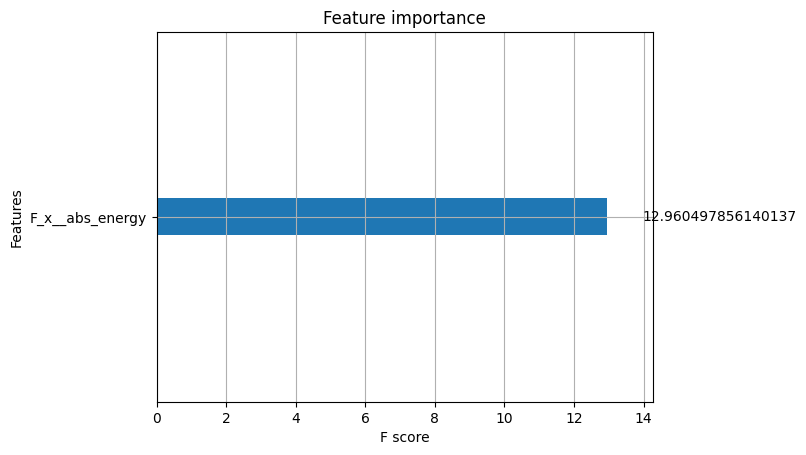

In [303]:
# ⑥-8 : XGBoost plot_importance 확인 및 시각화
# plot_importance를 통해 어떤 변수(특징)가 가장 유의미한지 확인합니다.
xgb.plot_importance(xgb_clf, importance_type = 'gain')
plt.show()

In [245]:
sum(xgb_clf.feature_importances_ != 0) # Fx 값의 abs_energy 특징만의 유의미함

np.int64(1)

In [304]:
# ⑥-9 : Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report

classification_report(y_test, xgb_clf.predict(efficient_features_test), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16.0},
 'false': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21.0}}